In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


EDA on the following dataset:

https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

In [4]:
df_sales = pd.read_csv(os.path.join(dirname, filename))
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [8]:
df_sales.shape

(9800, 18)

In [9]:
df_sales.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [10]:
df_sales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [12]:
 df_sales.duplicated().sum()

0

In [16]:
    for column in df_sales:
        print("Column"," ",column,"  uniquevalue are :", df_sales[column].nunique())
        print(df_sales[column].unique())
        print("-------------------------")
        print("Column"," ",column,"  value count is :", df_sales[column].value_counts())
        print("-------------------------")
        print( "column name:", column, "- misisng values ",df_sales[column].isnull().sum())
        print("------------------------------------------------------------------")   

Column   Row ID   uniquevalue are : 9800
[   1    2    3 ... 9798 9799 9800]
-------------------------
Column   Row ID   value count is : Row ID
1       1
6537    1
6530    1
6531    1
6532    1
       ..
3268    1
3269    1
3270    1
3271    1
9800    1
Name: count, Length: 9800, dtype: int64
-------------------------
column name: Row ID - misisng values  0
------------------------------------------------------------------
Column   Order ID   uniquevalue are : 4922
['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']
-------------------------
Column   Order ID   value count is : Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64
-------------------------
column name: Order ID - misisng values  0
---------

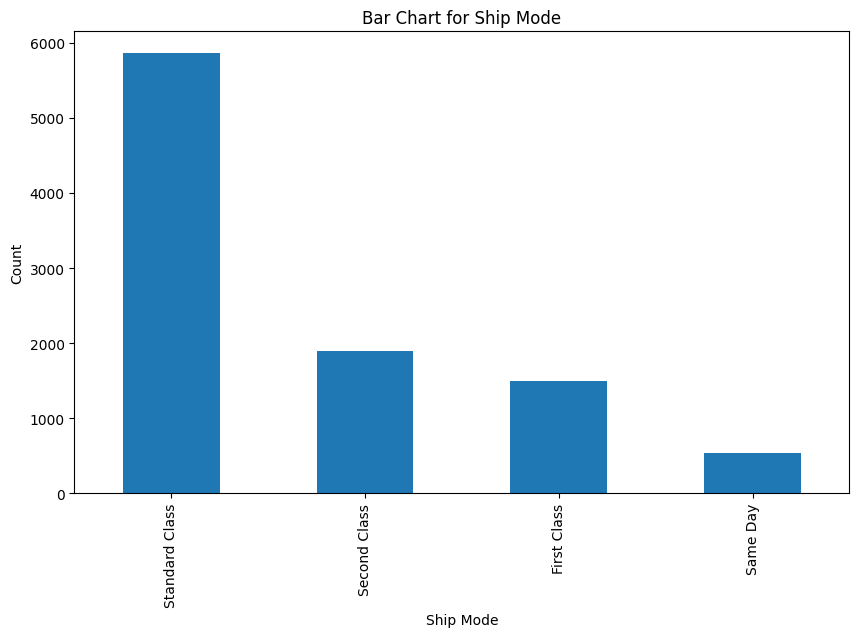

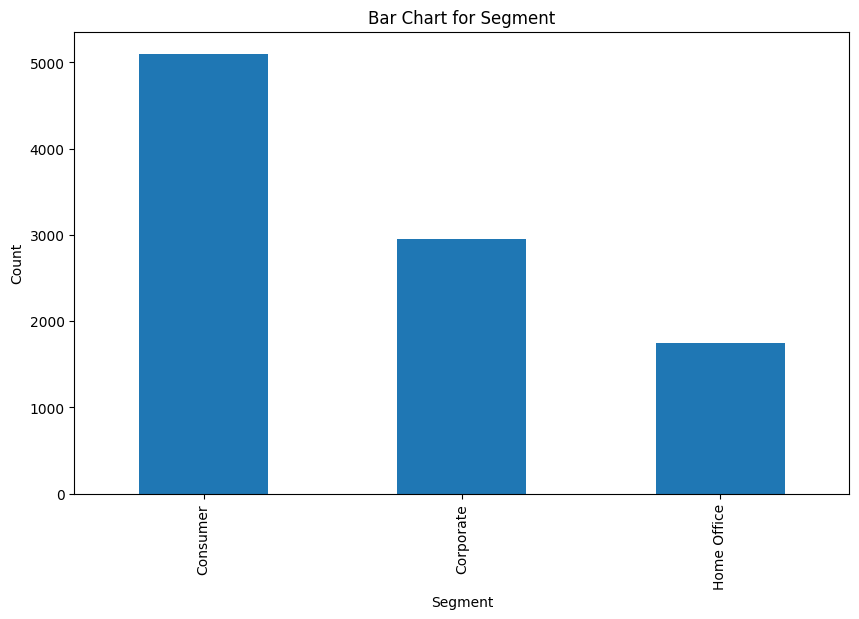

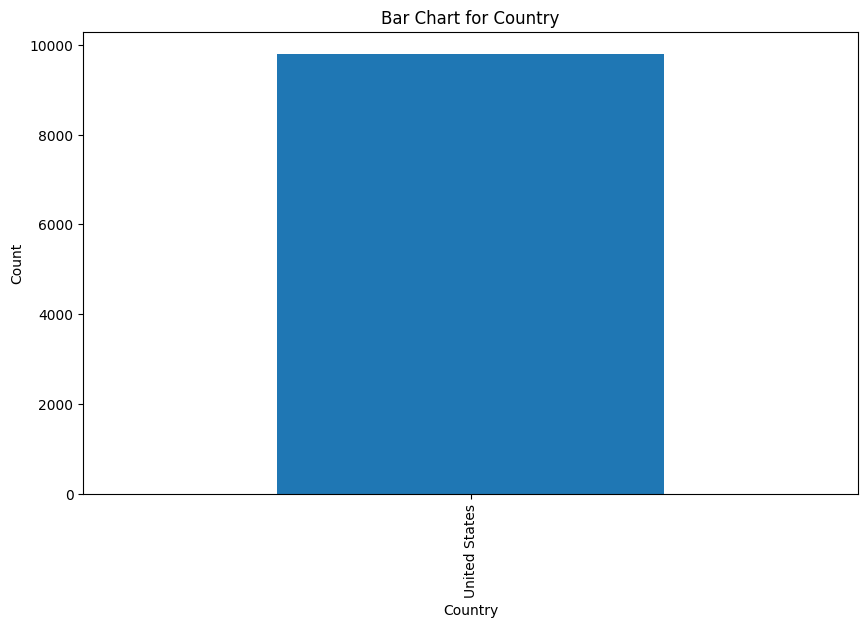

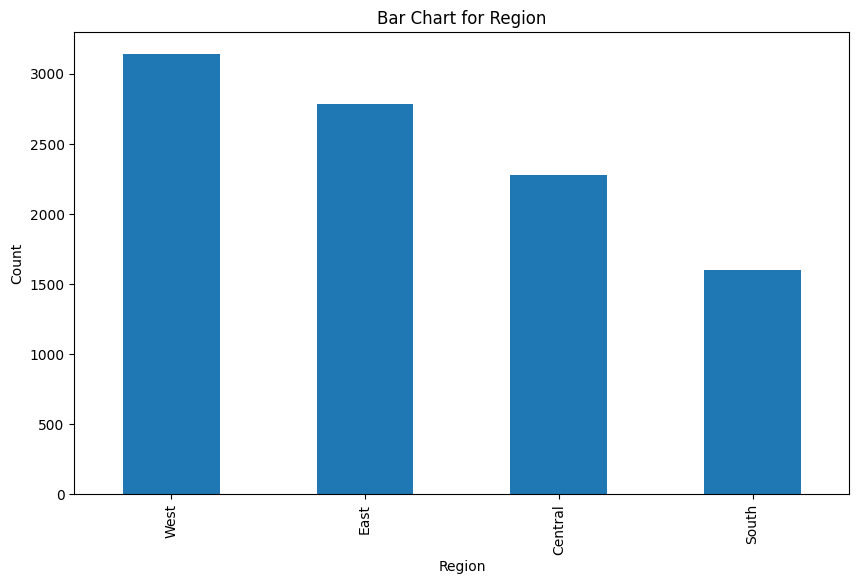

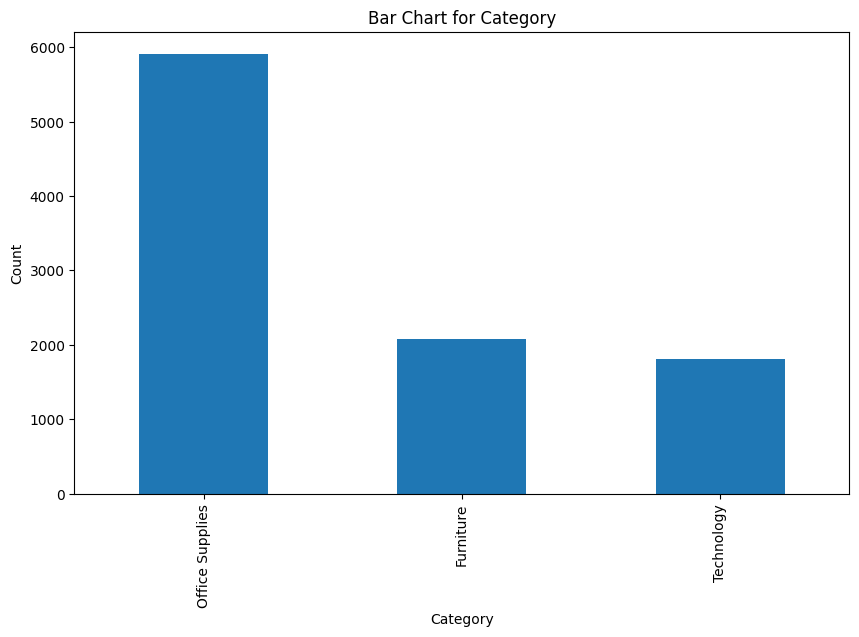

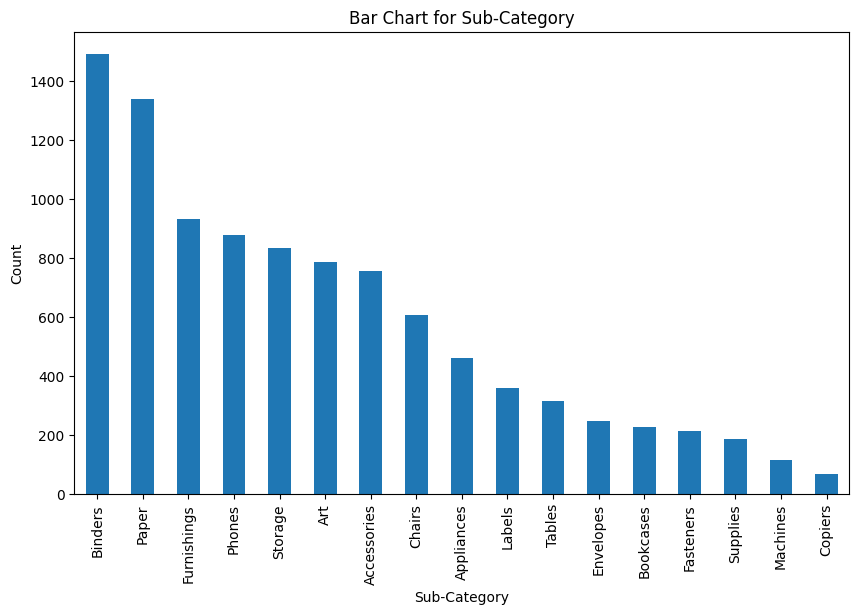

In [24]:
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']



#Plot bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_sales[column].value_counts().plot(kind='bar', rot=90)
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

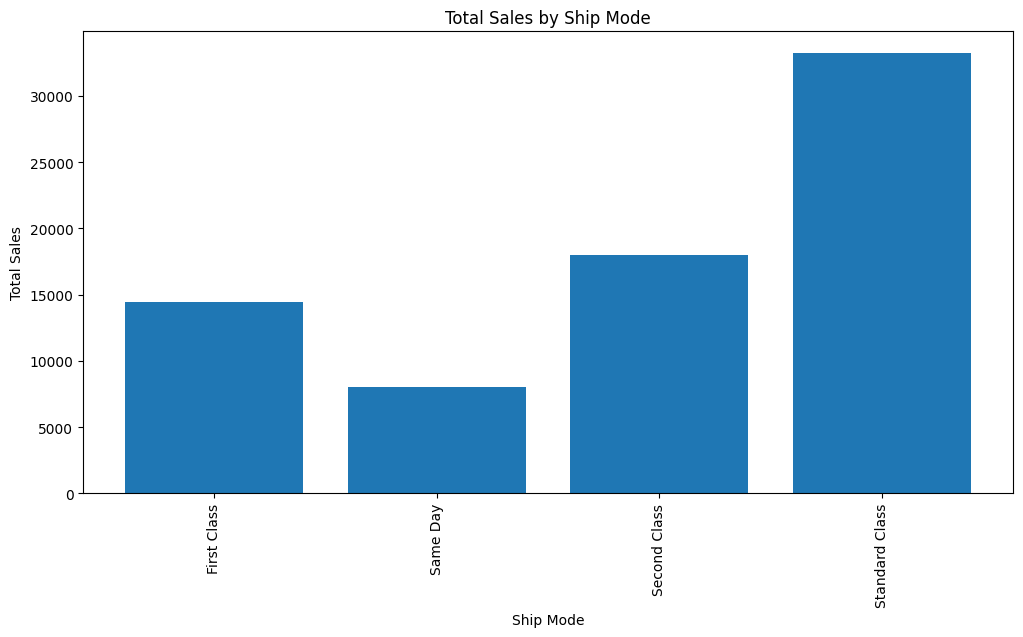

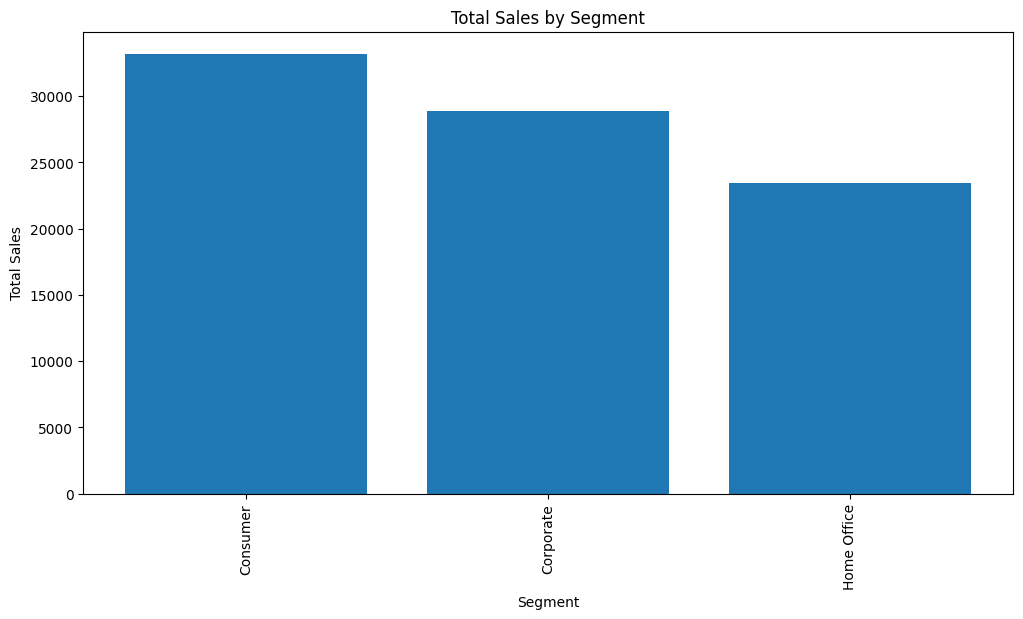

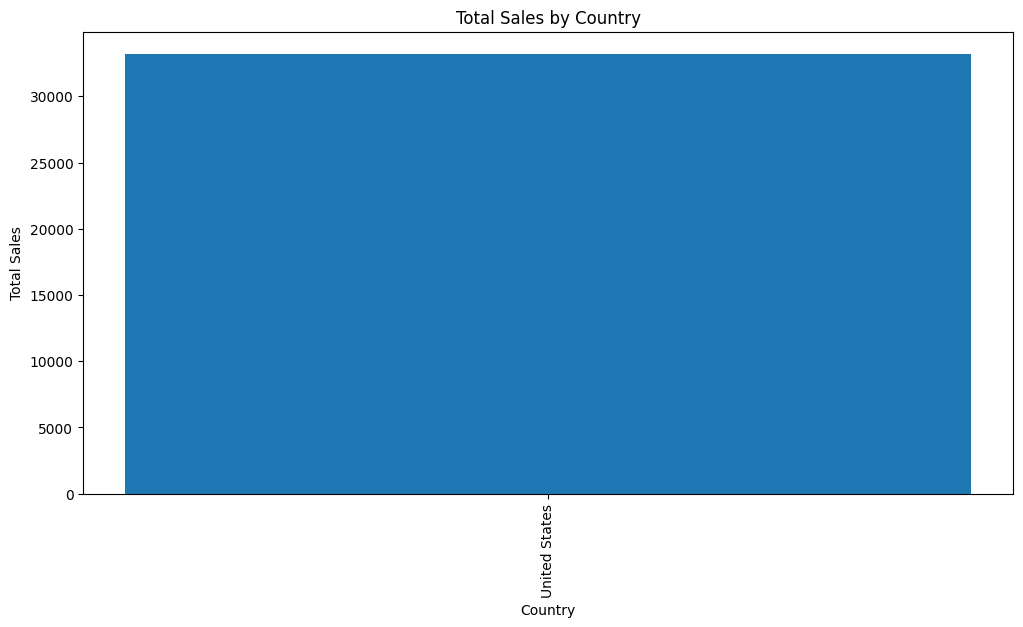

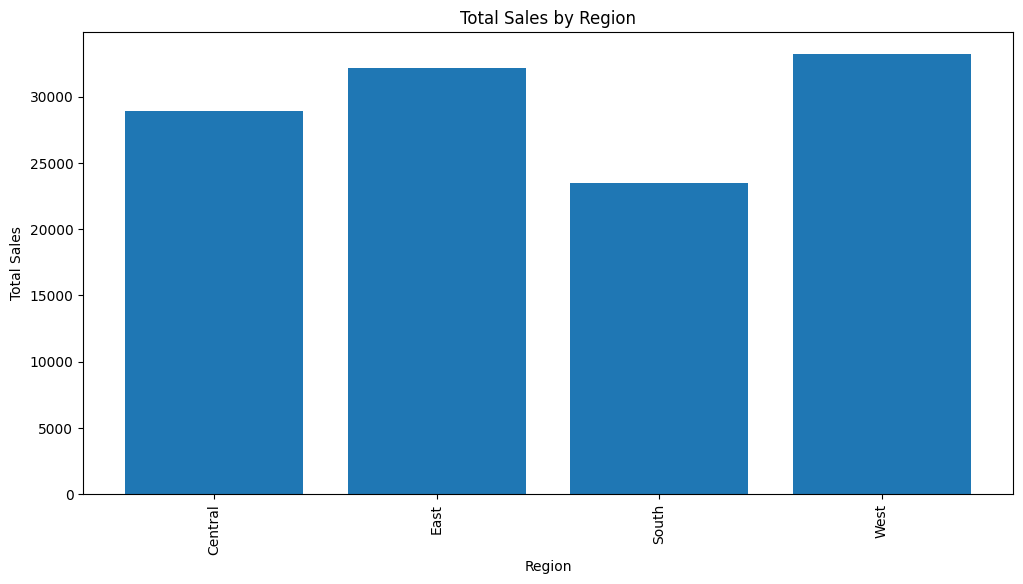

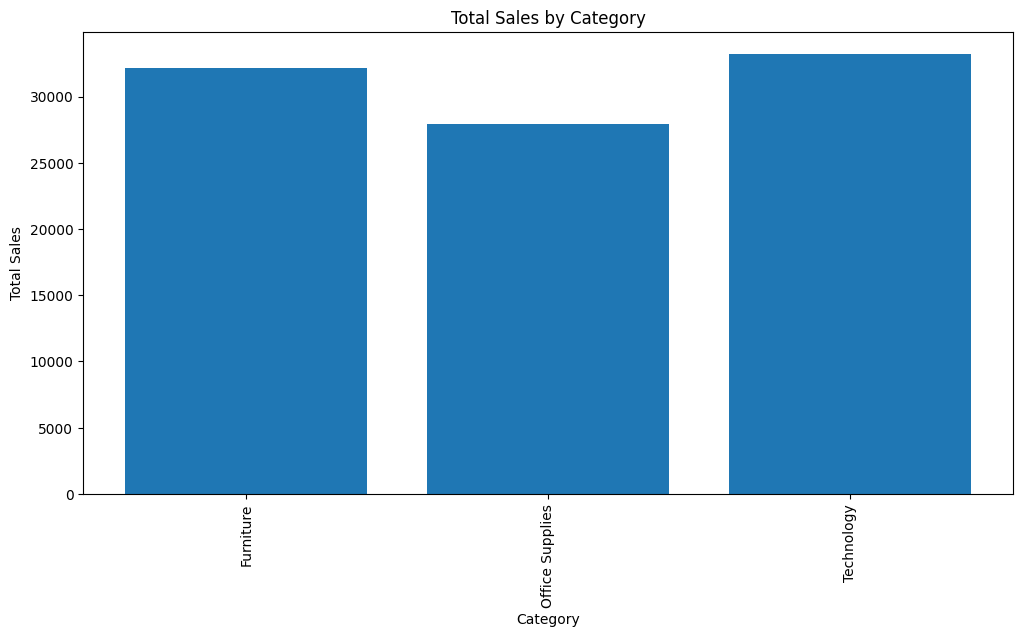

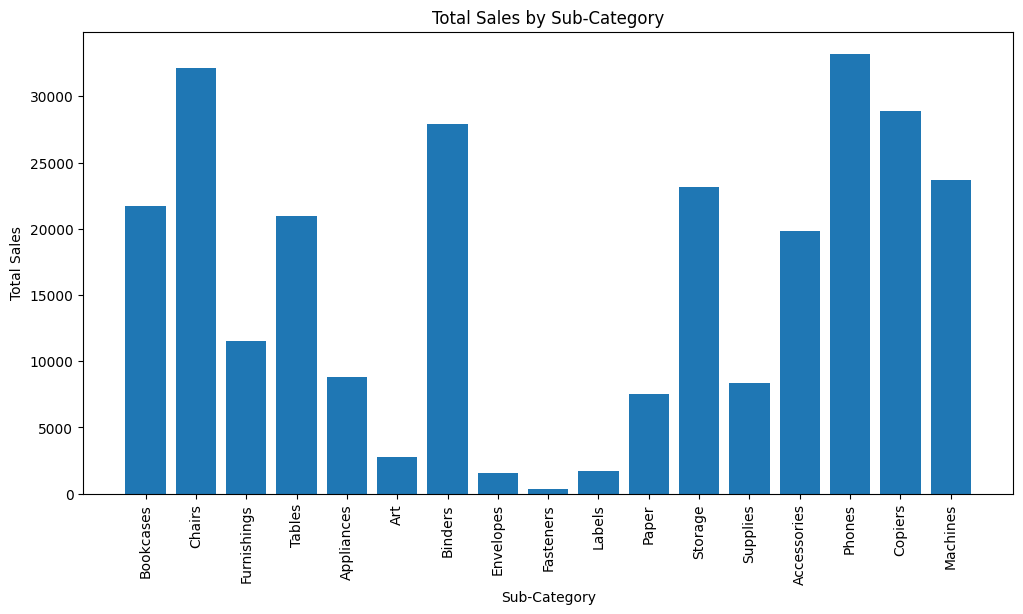

In [31]:
# Calculate total sales for each category
total_sales_by_category = df_sales.groupby(categorical_columns)['Sales'].sum().reset_index()

# Plot bar charts for each specified categorical column
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    plt.bar(total_sales_by_category[column], total_sales_by_category['Sales'])
    plt.title(f'Total Sales by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.show()

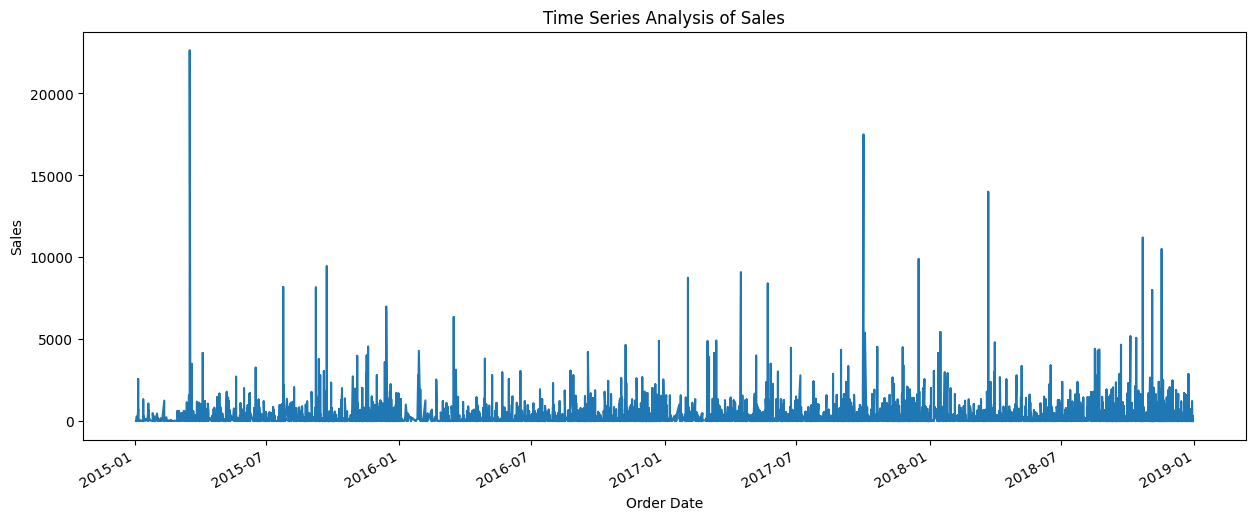

In [37]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format='%d/%m/%Y')
#df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df_sales.set_index('Order Date', inplace=True)
plt.figure(figsize=(15, 6))
df_sales['Sales'].plot()
plt.title('Time Series Analysis of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

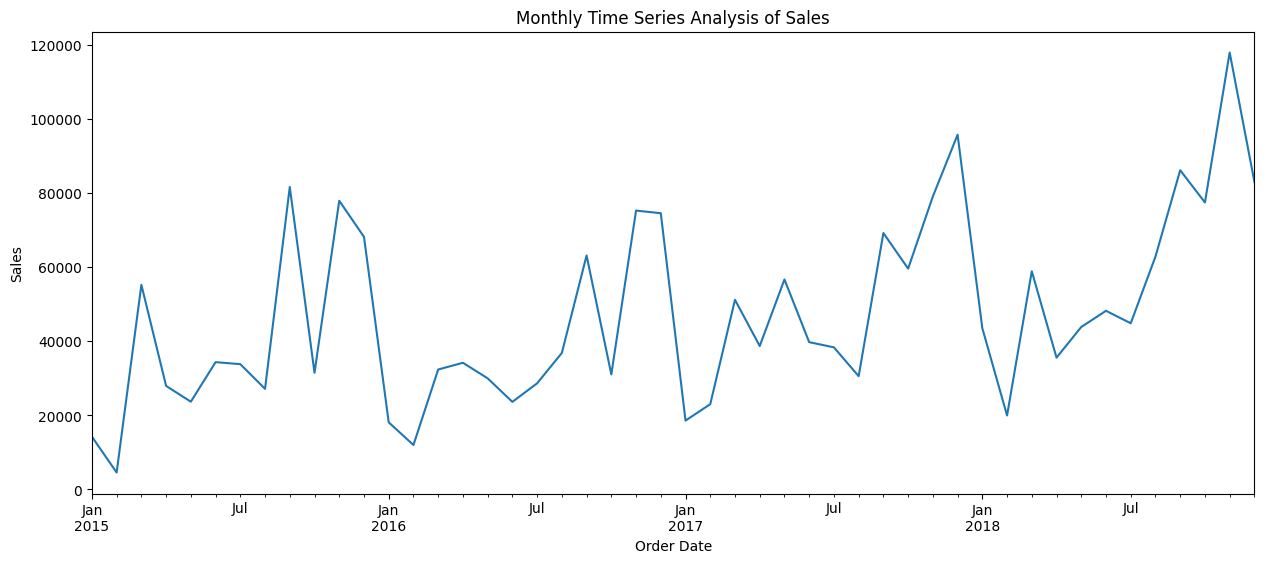

In [38]:
# Resample to monthly frequency and sum the sales
monthly_sales = df_sales['Sales'].resample('M').sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Time Series Analysis of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()